<a href="https://colab.research.google.com/github/LunaLuna02/Entrega_data1/blob/main/Entrega_final_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera entrega data science
Luna Vasquez.


# Análisis de boletas de ventas en cafeterías.
La base de datos que está en el radar de este proyecto es la de
una cafetería ficticia con información entregada por IBM, con 7 ubicaciones ficticias
alrededor de Estado Unidos, con información acerca de los productos vendidos,
identificación de los clientes individualmente, entre otros.
Esta base de datos puede entregar mucha información para planificar el futuro de la
empresa, proponer planes de marketing, individualizar la relación con el cliente, realizar
ingeniería de menú y por último pero no menor, propulsar la empresa hacia un futuro
económico positivo.

Cabe destacar que el consumo de café a nivel mundial ha aumentado significativamente
desde el principio del milenio, aproximadamente un 37%, más incluso en los países donde la mayoría de la población están dentro de la clase media o media alta.

A raíz de esto podemos dar como hipótesis que si la tendencia sigue igual, habrá un aumento en las ventas netas en la cafetería en todas sus áreas, tanto merchandising relacionado con preparaciones de café (v60, aeropress, cafeteras italianas, francesas, entre
otras), ventas de café a granel, como preparaciones terminadas.

# Alcance del análisis de los datos
Esta base de datos se considera dentro de la aplicación estratégica, ya que trata
directamente las acciones y futuro de la empresa. Tanto en el espectro de clientes,
información de la ventas, detalles de productos, totales de ventas, entre otros.

In [ ]:
#importar cada una de las herramientas
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#montar la base de colab
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

#Cargar el lugar y nombre de archivo
filename = 'Database_cafeteria_Luna_Vasquez.xlsx'
search_path = '/content/gdrive/MyDrive/Entregas_data_science/Database_cafeteria_Luna_Vasquez.xlsx'
file_path = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break
    df = pd.read_excel(file_path)

In [ ]:
import pandas as pd

# Cargar la base de datos en excel a pandas y una muestra.
df = pd.read_excel('/content/gdrive/MyDrive/Entregas_data_science/Database_cafeteria_Luna_Vasquez.xlsx')
# Pequeña muestra de la base de datos inicial.
df.head()

,transaction_id,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,3,17,99,Y,1,1,34,1,2.45,2.45,N


In [ ]:
# Organizar cada hoja de la base de datos dentro de un data frame.
xlsx = pd.ExcelFile('/content/gdrive/MyDrive/Entregas_data_science/Database_cafeteria_Luna_Vasquez.xlsx')
df1 = pd.read_excel(xlsx, '201904 sales reciepts')
df2 = pd.read_excel(xlsx, 'Customer')
df3 = pd.read_excel(xlsx, 'Dates')
df4 = pd.read_excel(xlsx, 'Customer')
df5 = pd.read_excel(xlsx, 'Generations')
df6 = pd.read_excel(xlsx, 'Product')
df7 = pd.read_excel(xlsx, 'Pastry inventory')
df8 = pd.read_excel(xlsx, 'Sales outlet')
df9 = pd.read_excel(xlsx, 'Sales target')
df10 = pd.read_excel(xlsx, 'Staff')

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 6))

# Make data
Mean1 = df6['current_wholesale_price']
Grupo = df6['product_category'].unique()

# Define los colores como una lista
bar_colors = ['tab:brown', 'tab:orange', 'tab:brown', 'tab:red', 'tab:red',
              'tab:red', 'tab:gray', 'tab:olive', 'tab:cyan']

# Creamos un diccionario que mapea cada categoría a un color
color_mapping = {category: color for category, color in zip(Grupo, bar_colors)}

# Plot
for category, price in zip(df6['product_category'], Mean1):
    ax.bar(category, price, color=color_mapping[category])

ax.set_ylabel('Precio producto')
ax.set_xlabel('Categoria de producto')
ax.set_title('Precio por categoria de producto')

plt.show()

En el presente gráfico se aprecia como son los precios de los productos a la venta en relación con la categoría, siendo los granos de café los productos más caros y los saborizantes los más baratos.

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 6))

# Make data
Sum_client = df1['customer_id']
Generation = df5['generation'].unique()

# Define los colores como una lista
bar_colors = ['tab:brown', 'tab:orange', 'tab:olive', 'tab:red', 'tab:cyan',
              'tab:red', 'tab:gray', 'tab:olive', 'tab:cyan']

# Creamos un diccionario que mapea cada categoría a un color
color_mapping = {category: color for category, color in zip(Generation, bar_colors)}

# Plot
for category, price in zip(df5['generation'], Sum_client):
    ax.bar(category, price, color=color_mapping[category])

ax.set_ylabel('Total de clientes')
ax.set_xlabel('Generacion')
ax.set_title('Total de clientes por generacion')

plt.show()

El gráfico de barras anterior nos permite desarrollar más la hipótesis inicial, como es la distribución de clientes en las cafeterías de esta cadena, y cuales son las edades promedio de las personas que la frecuentan.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = df2['gender'].groupby(by=df2['gender']).count()
mylabels = ['M', 'F', 'N']
mycolors = ['#FFF300', '#84F30E', '#EF5E15']


fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(y, labels = mylabels,autopct='%1.1f%%', colors=mycolors)
plt.legend()
ax.set_title('Genero de clientes')

Para segmentar aún más a los clientes de la cafetería, se realizó un Piechart del género de los clientes, destacando que el 43% de ellos son hombres, mientras que 32% mujeres y 24% no quiso responder o se identifican fuera del espectro binario.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data

y = (df1['quantity'] * df1['unit_price'])
x = df1['transaction_id']

# plot
fig, ax = plt.subplots(figsize=(20, 6))

ax.scatter(x, y, linewidth=1)

ax.set_title('Distribucion de las ganancias promedio por compra')
ax.set_ylabel('Precio promedio')
ax.set_xlabel('id de transaccion')
ax.set_box_aspect(0.5)
ax.autoscale()
plt.show()

En el gráfico de distribución podemos observar que como son las ventas promedio de las cafeterías, por lo general las ganancias por venta son bajas pero la cantidad de transacciones es alta.


In [ ]:
#Esta informacion no será usara para la primera entrega ya que requiere de la union de las hojas en el archivo Excel.
#Info para programar en data2, gracias al tutor Hugo por su ayuda.


total1 = (df1['quantity'] * df1['unit_price'])
total_cafe = (df1['product_category'].values == 'Coffee')

total_ventas = (total1).groupby(by=total_cafe)


print(total1)
#print(total_cafe)
print(total_ventas)

# Conclusión Primer entrega.
A forma de conclusión podemos decir que la base de datos nos ha entregado mucha información acerca del comportamiento de los clientes de la franquicia, tanto en sus edades generacionales, sus compras, género, entre otros.

Sin embargo aún falta más investigación para poder concretar si la hipótesis dada en el inicio es cierta o no.
Para esto se necesita re evaluar la distribución de información dentro de la base de datos (uniendo la información en una sola hoja) o trabajando de forma relacional (PK y FK).

Además en las próximas entregas se podrá poner en cuestionamiento la hipótesis haciendo el ejercicio mediante Machine learning e inteligencia artificial.



# Entrega final Data Science
Dentro de esta segunda entrega se desarrollará una de las preguntas que quedaron por resolver.

**¿Cómo es la conducta de los clientes?**

Para resolver esta interrogante, es necesario perfeccionar la base de datos para que nos entregue la información correcta sobre los clientes, eliminar los datos vacíos o nulos, utilizar la matemáticas y machine learning para poder tomar un decisión sobre qué curso debería tomar esta empresa.


Primero dentro de la agenda es analizar la base de datos en busca de información que nos permita entender el comportamiento de los clientes

In [ ]:
x = df1[['transaction_id', 'line_item_amount']]
x


NameError: name 'df1' is not defined

La primera relación que capta nuestra atención es la de el total de transacciones con el precio total de cada venta, ya que nos permitirá entender si el cliente acude al local con expectativas de gastar una gran cantidad de dinero o no.

<Axes: xlabel='transaction_id', ylabel='line_item_amount'>

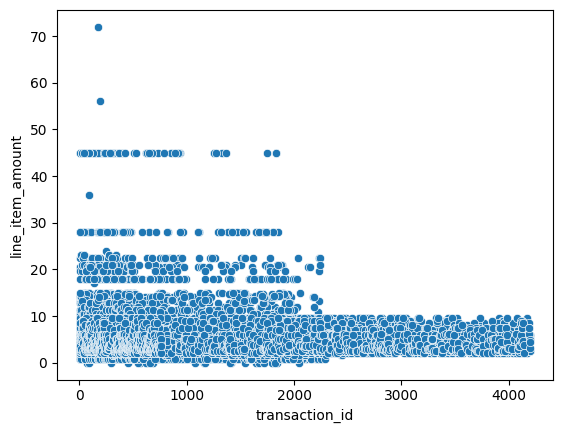

In [ ]:
sns.scatterplot(data=df1, x=df1['transaction_id'], y=df1['line_item_amount'])


El gráfico anterior nos muestra que las ventas del local son principalmente compras por montos pequeños. Una gran cantidad de transacciones de bajo precio entre los 0 y 25 dólares, mientras que escasas ventas dentro de los 30 y disminuyen considerablemente mientras aumenta el precio.

Ya que esta será la relación que tomaremos para trabajar, es necesario realizar una limpieza preliminar de los datos de la tabla, primero descartando todos los datos que sean NAN.

In [ ]:
df1.dropna(inplace=True)
df1

,transaction_id,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...
49885,753,8,42,0,N,1,1,30,1,3.00,3.00,N
49886,756,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49887,759,8,15,0,Y,1,1,31,1,2.20,2.20,N
49888,763,8,45,8030,N,1,1,44,2,5.00,2.50,N


Confirmar que la tabla posee una densidad equitativa de datos, refiriendonos a que todo el conteo de datos sea igual

In [ ]:
df1.describe()

,transaction_id,sales_outlet_id,staff_id,customer_id,order,line_item_id,product_id,quantity,line_item_amount,unit_price
count,49596.000000,49596.000000,49596.000000,49596.000000,49596.000000,49596.000000,49596.000000,49596.000000,49596.000000,49596.000000
mean,871.871300,5.335934,25.313110,2288.703323,1.173704,1.632087,47.889245,1.437596,4.656099,3.383529
std,859.631272,2.070810,12.446112,3241.258314,1.026148,1.413527,17.930866,0.540111,3.097781,2.663339
min,1.000000,3.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.800000
25%,222.000000,3.000000,15.000000,0.000000,1.000000,1.000000,33.000000,1.000000,3.000000,2.500000
50%,486.000000,5.000000,26.000000,2.000000,1.000000,1.000000,47.000000,1.000000,3.750000,3.000000
75%,1408.000000,8.000000,41.000000,5415.250000,1.000000,1.000000,60.000000,2.000000,6.000000,3.750000
max,4203.000000,8.000000,45.000000,8501.000000,9.000000,12.000000,87.000000,6.000000,72.000000,45.000000


Transformar los datos con la escala estandarizadora de sklearn, la cual resta la media de cada columna a cada casilla individual y la divide por la desviación estándar del mismo. Después de que se realiza este cálculo para cada dato, nos entrega una columna nueva con el mismo index anterior pero con ‘_T’ al final, indicando que está transformado.

In [ ]:
#Importamos todas las librerias necesarias para el calculo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

#Utilizamos StandardScaler para el desarrollo.
scaler = StandardScaler()
df1[['transaction_id_T', 'sales_outlet_id_T', 'staff_id_T', 'customer_id_T', 'order_T', 'line_item_id_T', 'product_id_T', 'quantity_T', 'line_item_amount_T', 'unit_price_T']] = scaler.fit_transform(df1[['transaction_id', 'sales_outlet_id', 'staff_id', 'customer_id', 'order', 'line_item_id', 'product_id', 'quantity', 'line_item_amount', 'unit_price']])
df1

,transaction_id,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,...,transaction_id_T,sales_outlet_id_T,staff_id_T,customer_id_T,order_T,line_item_id_T,product_id_T,quantity_T,line_item_amount_T,unit_price_T
0,7,3,12,558,N,1,1,52,1,2.50,...,-1.006106,-1.128041,-1.069671,-0.533966,-0.169279,-0.447175,0.229258,-0.810204,-0.696021,-0.331741
1,11,3,17,781,N,1,1,27,2,7.00,...,-1.001453,-1.128041,-0.667935,-0.465165,-0.169279,-0.447175,-1.165000,1.041285,0.756646,0.043732
2,19,3,17,788,Y,1,1,46,2,5.00,...,-0.992146,-1.128041,-0.667935,-0.463005,-0.169279,-0.447175,-0.105364,1.041285,0.111016,-0.331741
3,32,3,12,683,N,1,1,23,2,5.00,...,-0.977023,-1.128041,-1.069671,-0.495400,-0.169279,-0.447175,-1.388081,1.041285,0.111016,-0.331741
4,33,3,17,99,Y,1,1,34,1,2.45,...,-0.975860,-1.128041,-0.667935,-0.675579,-0.169279,-0.447175,-0.774608,-0.810204,-0.712162,-0.350514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49885,753,8,42,0,N,1,1,30,1,3.00,...,-0.138283,1.286498,1.340745,-0.706123,-0.169279,-0.447175,-0.997689,-0.810204,-0.534614,-0.144004
49886,756,8,42,8412,Y,1,1,25,2,4.40,...,-0.134793,1.286498,1.340745,1.889192,-0.169279,-0.447175,-1.276540,1.041285,-0.082673,-0.444382
49887,759,8,15,0,Y,1,1,31,1,2.20,...,-0.131303,1.286498,-0.828629,-0.706123,-0.169279,-0.447175,-0.941919,-0.810204,-0.792866,-0.444382
49888,763,8,45,8030,N,1,1,44,2,5.00,...,-0.126650,1.286498,1.581786,1.771335,-0.169279,-0.447175,-0.216904,1.041285,0.111016,-0.331741


En el siguiente código vamos a buscar cual es el “K” mas acertado para nuestra relación de datos, para esto utilizamos el método del codo, con Means e Inertias (cuanto más variedad haya entre las observaciones del dataset, mayor serán sus distancias en relación con los centros)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

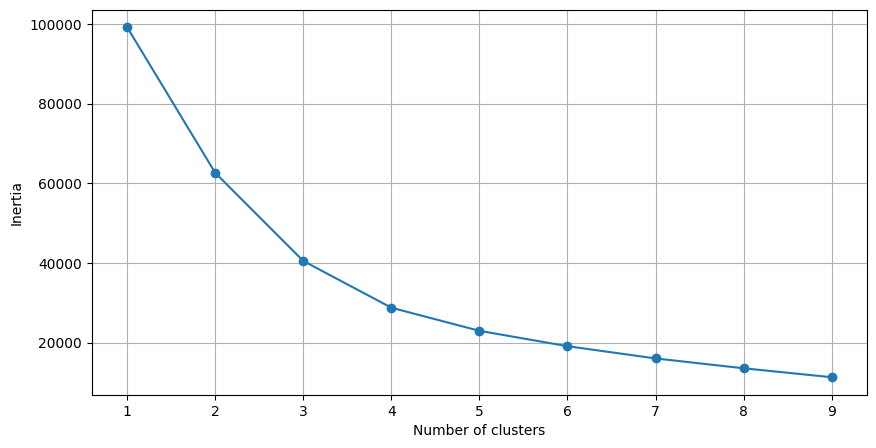

In [ ]:
#optimizando clusters

def optimize_k_means(data, max_k):
  means = []
  inertias =[]

  for k in range(1, max_k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    means.append(k)
    inertias.append(kmeans.inertia_)

  fig =plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()

optimize_k_means(df1[['line_item_amount_T', 'transaction_id_T']], 10)

Realizamos la búsqueda entre un número de clusters entre 0 y 10, donde se puede observar una depreciación considerable de la inercia entre el cluster 4 y 6, por lo cual estos serán nuestros primeros puntos de referencia.

Aplicamos la metodología Kmeans con una clusterificación de 6 al modelo.

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df1[['line_item_amount_T', 'transaction_id_T']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

Ingresamos la data obtenida por el modelo a la base de datos para que podamos comprobar que se obtuvo de forma correcta la información y comprobamos.

In [ ]:
df1['KMeans_6'] = kmeans.labels_
df1

,transaction_id,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,...,sales_outlet_id_T,staff_id_T,customer_id_T,order_T,line_item_id_T,product_id_T,quantity_T,line_item_amount_T,unit_price_T,KMeans_6
0,7,3,12,558,N,1,1,52,1,2.50,...,-1.128041,-1.069671,-0.533966,-0.169279,-0.447175,0.229258,-0.810204,-0.696021,-0.331741,0
1,11,3,17,781,N,1,1,27,2,7.00,...,-1.128041,-0.667935,-0.465165,-0.169279,-0.447175,-1.165000,1.041285,0.756646,0.043732,4
2,19,3,17,788,Y,1,1,46,2,5.00,...,-1.128041,-0.667935,-0.463005,-0.169279,-0.447175,-0.105364,1.041285,0.111016,-0.331741,0
3,32,3,12,683,N,1,1,23,2,5.00,...,-1.128041,-1.069671,-0.495400,-0.169279,-0.447175,-1.388081,1.041285,0.111016,-0.331741,0
4,33,3,17,99,Y,1,1,34,1,2.45,...,-1.128041,-0.667935,-0.675579,-0.169279,-0.447175,-0.774608,-0.810204,-0.712162,-0.350514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49885,753,8,42,0,N,1,1,30,1,3.00,...,1.286498,1.340745,-0.706123,-0.169279,-0.447175,-0.997689,-0.810204,-0.534614,-0.144004,0
49886,756,8,42,8412,Y,1,1,25,2,4.40,...,1.286498,1.340745,1.889192,-0.169279,-0.447175,-1.276540,1.041285,-0.082673,-0.444382,0
49887,759,8,15,0,Y,1,1,31,1,2.20,...,1.286498,-0.828629,-0.706123,-0.169279,-0.447175,-0.941919,-0.810204,-0.792866,-0.444382,0
49888,763,8,45,8030,N,1,1,44,2,5.00,...,1.286498,1.581786,1.771335,-0.169279,-0.447175,-0.216904,1.041285,0.111016,-0.331741,0


Comenzamos a diseñar el gráfico en base a la información conseguida anteriormente.

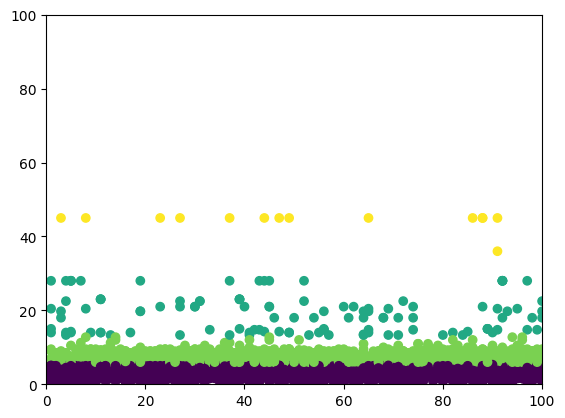

In [ ]:
plt.scatter(x=df1['transaction_id'], y=df1['line_item_amount'], c=df1['KMeans_6'])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

Se puede observar una buena implementación del modelo a la base de datos inicial, cuantificando cada uno de los datos y separándolos bajo sus respectivos grupos.

Se propuso un desarrollo extra del gráfico anterior, uno en cual podemos observar diferentes medidas de “K” en 6 gráficos, donde se puede observar con mayor claridad las diferencias e importancias de una correcta medición de “K”

In [ ]:
for k in range(1, 9):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(df1[['transaction_id_T', 'line_item_amount_T']])
  df1[f'KMeans_{k}'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
df1

,transaction_id,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,...,unit_price_T,kmeans_6,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5,KMeans_6,KMeans_7,KMeans_8
0,7,3,12,558,N,1,1,52,1,2.50,...,-0.331741,0,0,1,1,3,0,1,0,2
1,11,3,17,781,N,1,1,27,2,7.00,...,0.043732,2,0,1,1,0,4,3,6,5
2,19,3,17,788,Y,1,1,46,2,5.00,...,-0.331741,0,0,1,1,3,0,1,0,2
3,32,3,12,683,N,1,1,23,2,5.00,...,-0.331741,0,0,1,1,3,0,1,0,2
4,33,3,17,99,Y,1,1,34,1,2.45,...,-0.350514,0,0,1,1,3,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49885,753,8,42,0,N,1,1,30,1,3.00,...,-0.144004,0,0,1,1,3,0,1,0,0
49886,756,8,42,8412,Y,1,1,25,2,4.40,...,-0.444382,0,0,1,1,3,0,1,0,0
49887,759,8,15,0,Y,1,1,31,1,2.20,...,-0.444382,0,0,1,1,3,0,1,0,0
49888,763,8,45,8030,N,1,1,44,2,5.00,...,-0.331741,0,0,1,1,3,0,1,0,0


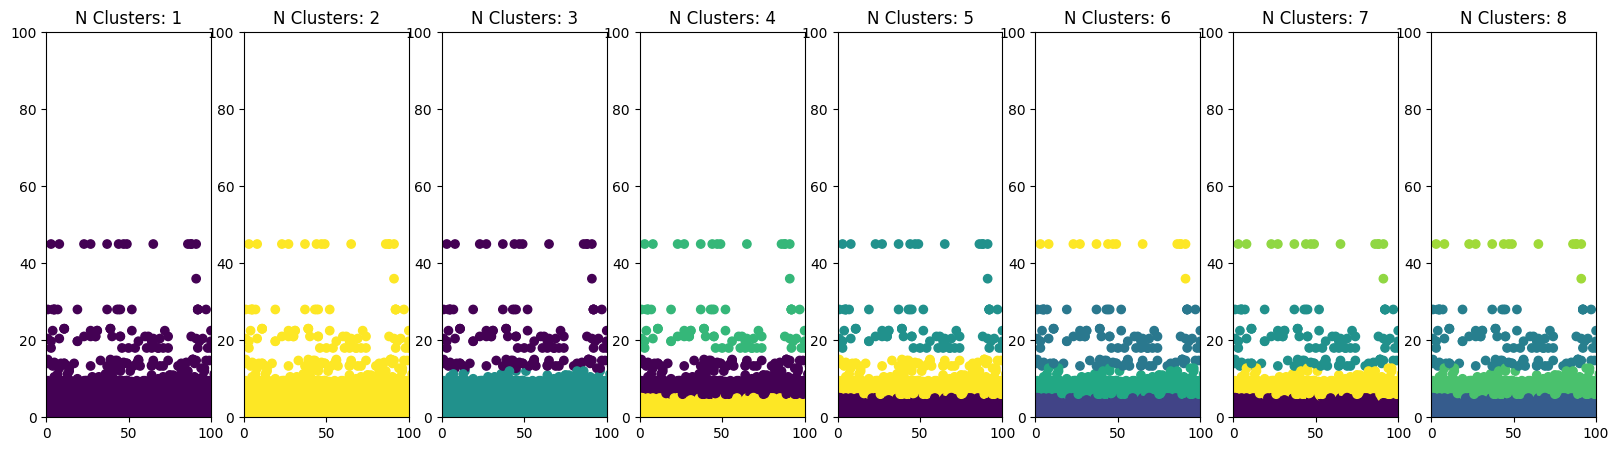

In [ ]:
fig, axs =plt.subplots(nrows=1, ncols=8, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
  ax.scatter(x=df1['transaction_id'], y=df1['line_item_amount'], c=df1[f'KMeans_{i}'])
  ax.set_xlim(0, 100)
  ax.set_ylim(0, 100)
  ax.set_title(f'N Clusters: {i}')


Aquí podemos ver los 8 gráficos al mismo tiempo, desde el “K” 1 hasta el 8, donde se puede apreciar que los primeros 3 no son realmente útiles para comprobar la hipótesis, mientras que 4 y 5 nos proveen mucha más información de las agrupaciones, sin embargo 6 es el que nos comunica la mayor cantidad de información sin necesidad de derrochar recursos informáticos.

In [ ]:
kendall = df1['transaction_id'].corr(df1['line_item_amount'] ,method='kendall')

kendall


0.014270578896901288

La escala de kendall va desde el −1 ≤ τ ≤ 1, por lo que un 0.14 significa que la relacion entre los datos es nula.

In [ ]:
spearman = df1['transaction_id'].corr(df1['line_item_amount'] ,method='spearman')
spearman

0.020907798097735086

La relacion de Spearman dice que entre mas se acerque a 1 el coeficiente, significa que X crece mientras Y disminuye, lo cual es cierto pero poco comprobable por la falta de precision de la relacion.

In [ ]:
pearson = df1['transaction_id'].corr(df1['line_item_amount'])
pearson

-0.013258002770921139

Un -0.013 en la escala de pearson se considera como una negativa correlacion, o sea que mientras X crece, Y se achica y viceversa. Pero como fue dicho anteriormente, la relacion es muy poco acertada.

# Conclusión de entrega final.

A modo de conclusión podemos decir que existe una gran cantidad de ventas en la base de datos de la cafetería elegida, la cual nos permite desarrollar un montón de predicciones a futuro en base al comportamiento de los clientes.

En este primer caso vimos cómo era la actitud de compras de los clientes en términos monetarios, entregándonos información clave para poder desarrollar un modelo de marketing a futuro, saber que productos fortalecer y cuales dejar de lado.

Se pudo comprobar mediante el uso del método KMeans que la gran mayoría de las ventas son de productos de bajo costo, y que las ventas de productos más caros son una ocurrencia muy extraña.
Sin embargo, a la hora de comprobar la relacion de los datos, los resultados no fueron los esperados, siendo las relaciones entre los dos campos muy poco certera a pesar de ser comprobable a simple vista en el primer grafico.

A pesar de la aparente poca relacion entre los datos, los graficos siguen expresando una clara tendencia a los precios mas baratos de la cafeteria, por esto se puede decir que si el cafe se enfoca en esos productos más baratos, lo más probable es que vea un futuro financiero exitoso, mientras que si deja de lado o le sube los precios a los productos más baratos, lo más probable es que su negocio comience a decaer.